In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# 1. Linear Regression

- Features (inputs), we'll call these x (or x if vectors)
- Training examples, many x(i) for which y(i) is known 
(e.g., many movies for which we know the rating)
- A model, a function that represents the relationship 
between x and y
- A loss/a cost/an objective function, which tells us 
how well our model approximates the training 
examples
- Optimization, a way of finding the parameters of 
our model that minimizes the loss function


## 1.1 Single

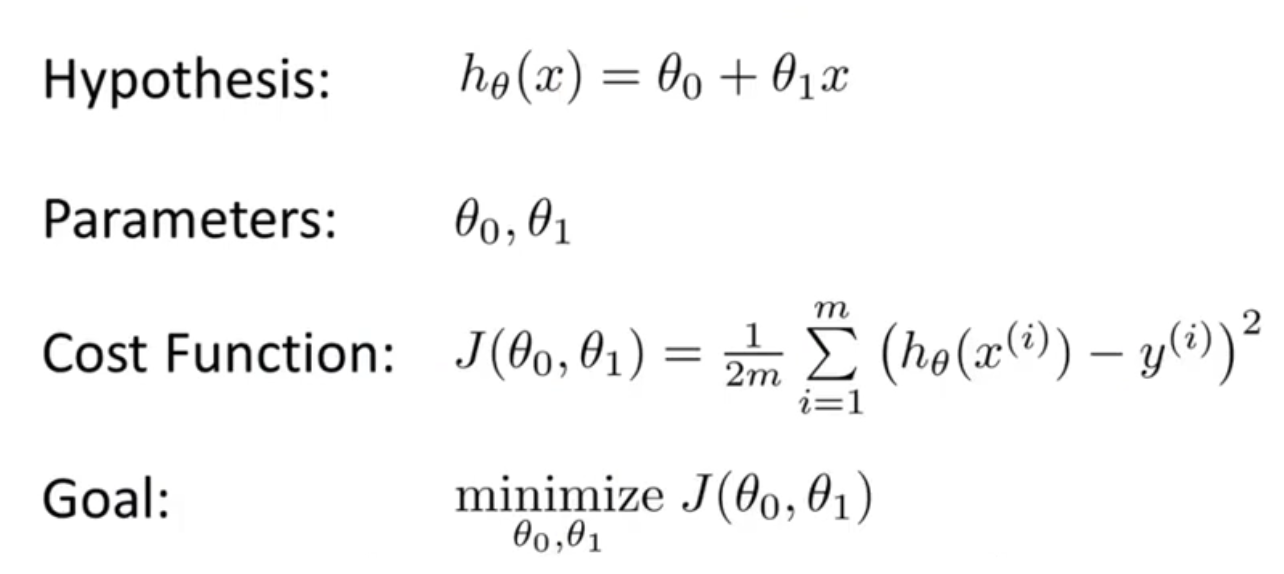

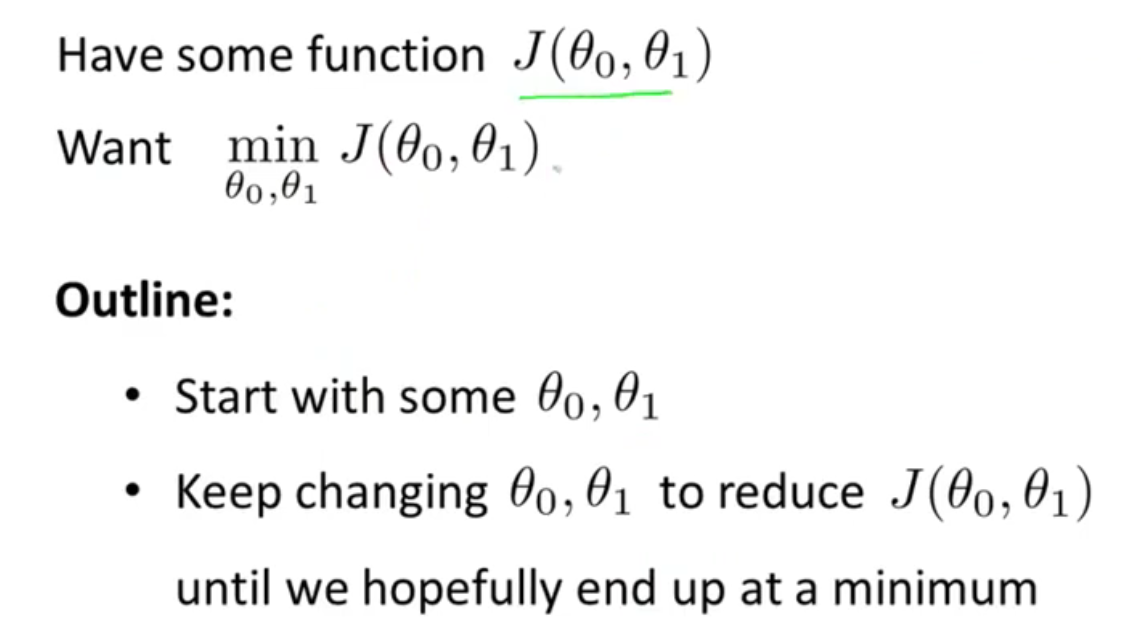

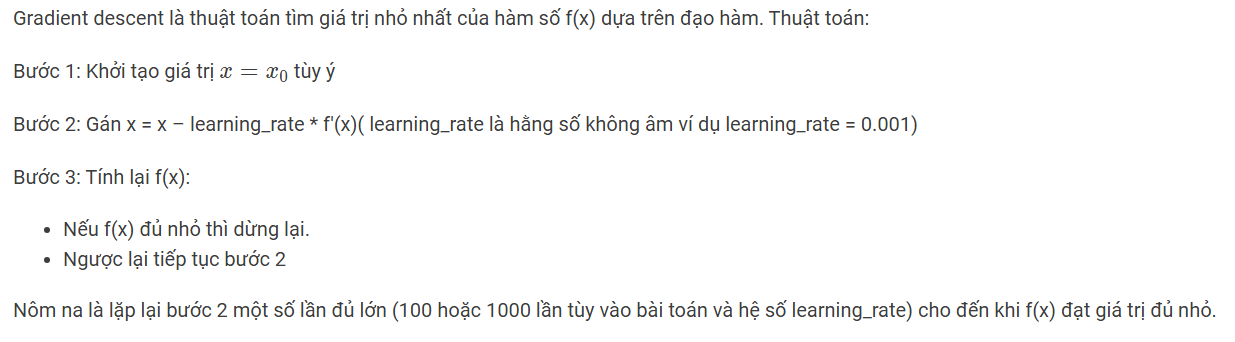

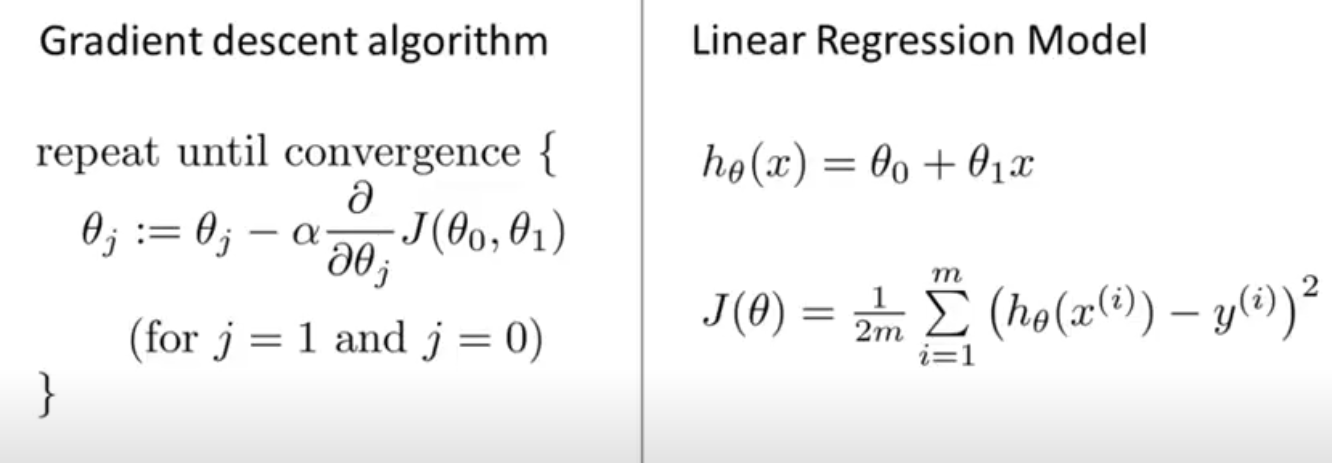

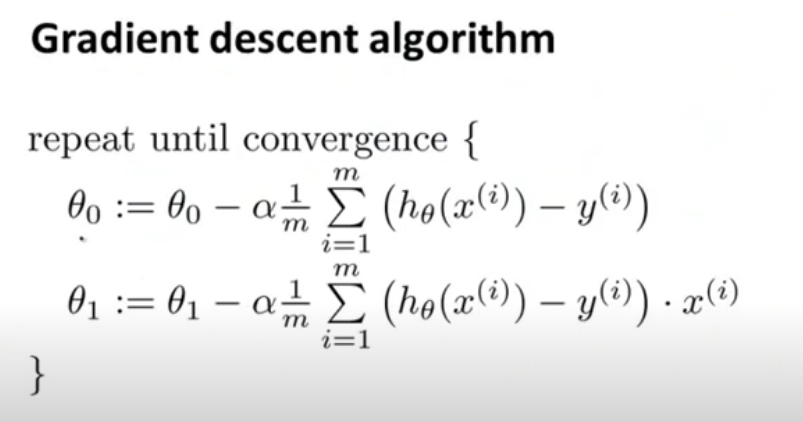

- Đạo hàm từng biến của ho(x)' * J(o)'
- Đạo hàm của F(g(x))' = F(x)' * g(x)'
- Example ((2x + 1)^2)' = 2*(2x+1) * 2

## 1.2 Multiple

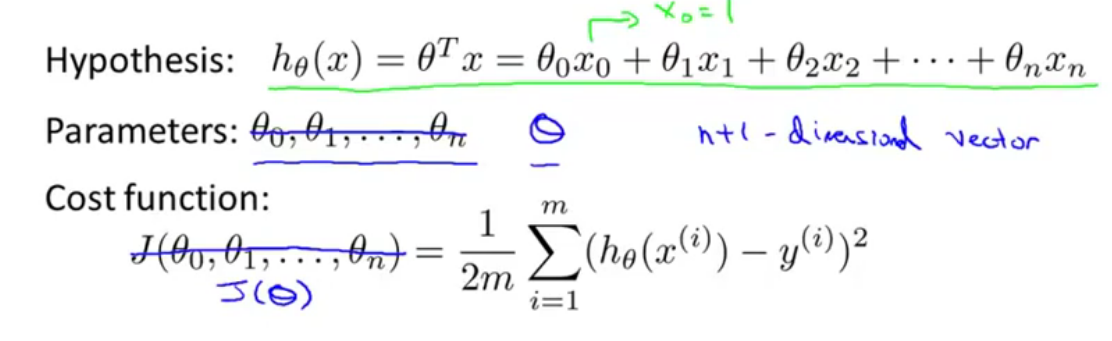

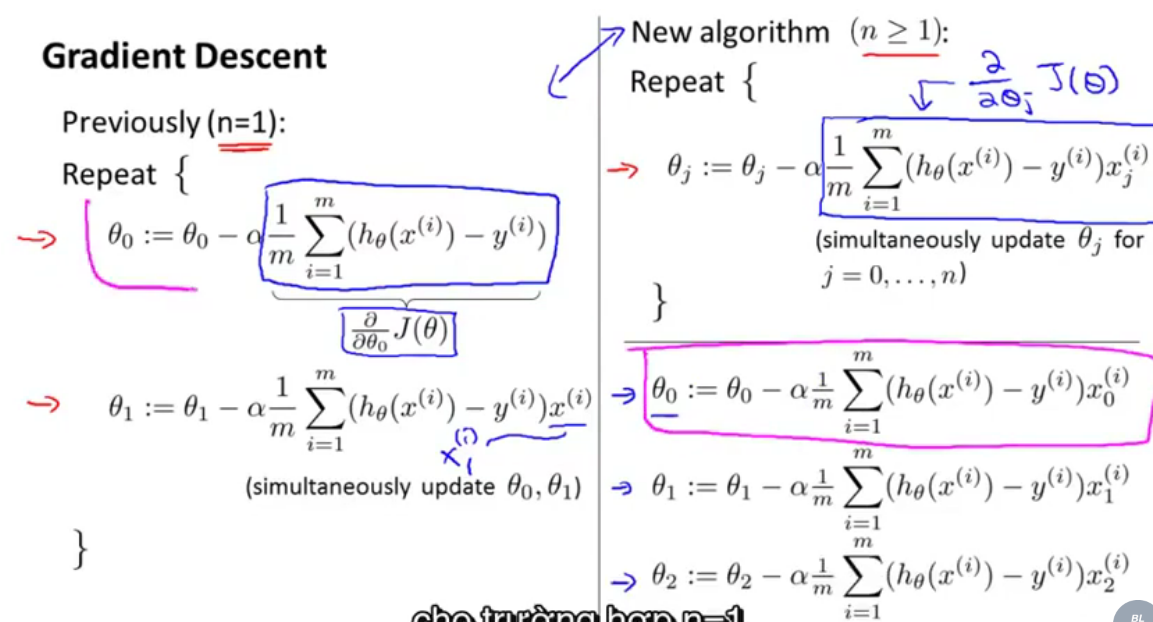

In [2]:
class LinearRegression():
    def __init__(self,learning_rate,epochs,bias=0):
        self.learning_rate = learning_rate
        self.epochs=epochs
    def CostFunction(self):
        #MSE
        J = (1/(2*self.num_row))* np.sum(
            np.square(
                np.array([self.fit_transform(self.input.iloc[index]) for index in range(self.num_row)]) - np.array(self.target)
            )
        )
        return J
    def predict(self,x):
        x = np.hstack((np.ones((x.shape[0], 1)), np.array(x)))
        return [np.sum(np.multiply(row, weights)) for row in x]
     def fit_transform(self,x):
        return [np.sum(np.multiply(row, weights)) for row in np.array(x)]
    def update_weights(self):
        #GradientDescent
        self.weight = [self.weights[i] - (self.learning_rate * (1/self.num_row) 
                       * np.sum(
                           np.multiply(
                               np.array([self.fit_transform(self.input.iloc[index]) for index in range(self.num_row)]) - np.array(self.target)
                               ,np.array(self.input.iloc[:,i])
                           )
                       ))
            for i in range(len(self.weights))
        ]
    def fit(self,input,target):
        self.num_features = input.shape[1]
        self.num_row = input.shape[0]
        self.input = input.insert(0, 'x0', 1)
        self.target = target
        self.weights=np.zeros(self.num_features + 1)
        for i in range(self.epochs):
            self.update_weights()
            cost = self.CostFunction()
            print(f"Epoch {i+1}: Weight = {self.weight}, Bias = {self.bias}, Learning Rate = {self.learning_rate}\nCost = {cost}")

In [3]:
# url = 'https://raw.githubusercontent.com/nttuan8/DL_Tutorial/master/L1/data_linear.csv'
# data = pd.read_csv(url)
# input = np.array(data['Diện tích'])
# target = np.array(data['Giá'])
input_path = '/kaggle/input/iris/Iris.csv'
df = pd.read_csv(input_path)
df.head(5)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
input = df[['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']]
target = df[['Species']]

In [18]:
input.head(5)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [32]:
input.iloc[0:2].shape

(2, 4)

In [10]:
np.array(input.iloc[:,0])

array([5.1, 4.9, 4.7, 4.6, 5. , 5.4, 4.6, 5. , 4.4, 4.9, 5.4, 4.8, 4.8,
       4.3, 5.8, 5.7, 5.4, 5.1, 5.7, 5.1, 5.4, 5.1, 4.6, 5.1, 4.8, 5. ,
       5. , 5.2, 5.2, 4.7, 4.8, 5.4, 5.2, 5.5, 4.9, 5. , 5.5, 4.9, 4.4,
       5.1, 5. , 4.5, 4.4, 5. , 5.1, 4.8, 5.1, 4.6, 5.3, 5. , 7. , 6.4,
       6.9, 5.5, 6.5, 5.7, 6.3, 4.9, 6.6, 5.2, 5. , 5.9, 6. , 6.1, 5.6,
       6.7, 5.6, 5.8, 6.2, 5.6, 5.9, 6.1, 6.3, 6.1, 6.4, 6.6, 6.8, 6.7,
       6. , 5.7, 5.5, 5.5, 5.8, 6. , 5.4, 6. , 6.7, 6.3, 5.6, 5.5, 5.5,
       6.1, 5.8, 5. , 5.6, 5.7, 5.7, 6.2, 5.1, 5.7, 6.3, 5.8, 7.1, 6.3,
       6.5, 7.6, 4.9, 7.3, 6.7, 7.2, 6.5, 6.4, 6.8, 5.7, 5.8, 6.4, 6.5,
       7.7, 7.7, 6. , 6.9, 5.6, 7.7, 6.3, 6.7, 7.2, 6.2, 6.1, 6.4, 7.2,
       7.4, 7.9, 6.4, 6.3, 6.1, 7.7, 6.3, 6.4, 6. , 6.9, 6.7, 6.9, 5.8,
       6.8, 6.7, 6.7, 6.3, 6.5, 6.2, 5.9])

In [15]:
target.head(5)

,Species
0,Iris-setosa
1,Iris-setosa
2,Iris-setosa
3,Iris-setosa
4,Iris-setosa


In [79]:
LRS = LinearRegression(0.0001,50)
LRS.fit(input,target)


Epoch 1: Weight = 7.044722974037333, Bias = 0.09816566333333335, Learning Rate = 0.0001
Cost = 151783.53755870598
Epoch 2: Weight = 10.804914543669346, Bias = 0.1505308107690907, Learning Rate = 0.0001
Cost = 43333.03608789072
Epoch 3: Weight = 12.811954727756943, Bias = 0.17844947648749637, Learning Rate = 0.0001
Cost = 12435.520057742033
Epoch 4: Weight = 13.88323288000026, Bias = 0.19331958914276082, Learning Rate = 0.0001
Cost = 3632.826787918326
Epoch 5: Weight = 14.455038717721925, Bias = 0.2012249067971782, Learning Rate = 0.0001
Cost = 1124.9420291570314
Epoch 6: Weight = 14.760246227571972, Bias = 0.2054126959746393, Learning Rate = 0.0001
Cost = 410.4463652431886
Epoch 7: Weight = 14.923154221796267, Bias = 0.20761621755915735, Learning Rate = 0.0001
Cost = 206.8867274004009
Epoch 8: Weight = 15.010108430753045, Bias = 0.20876061682905903, Learning Rate = 0.0001
Cost = 148.89261322903468
Epoch 9: Weight = 15.056521549521495, Bias = 0.20933969930081467, Learning Rate = 0.0001


In [80]:
target_predict = LRS.predict(input)

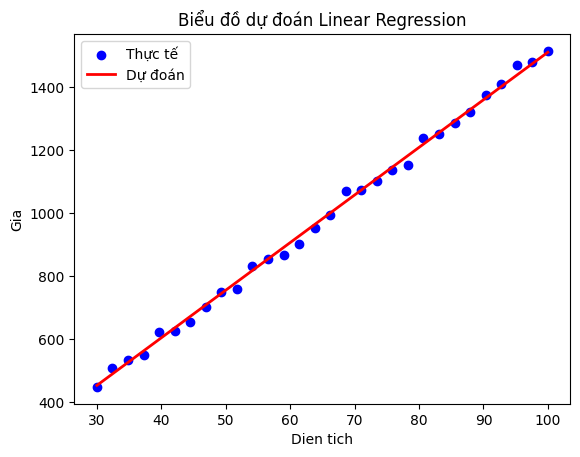

In [82]:
# Dự đoán và vẽ biểu đồ
plt.scatter(input, target, color='blue', label='Thực tế')
plt.plot(input, target_predict, color='red', linewidth=2, label='Dự đoán')
plt.xlabel('Dien tich')
plt.ylabel('Gia')
plt.title('Biểu đồ dự đoán Linear Regression')
plt.legend()
plt.show()
